# Analysis of an E-commerce Dataset
We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset.png" align="left" width="400"/>


## 1. Remove missing data

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load CSV data into the notebook
df = pd.read_csv('The E-commerce Dataset.csv')
df.shape

(2685, 12)

In [3]:
# Number of null values
print(df.isnull().sum())

Unnamed: 0     0
userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64


In [4]:
# Before cleaning
df.shape

(2685, 12)

## Data Cleaning

In [5]:
# Dropping missing values of gender/rating/helpfulness
temp_df = df.dropna()
print('Total values after removing empty values of gender, rating & helpfulness = ',temp_df.shape)

# Clean 'none' reviews
clean_df = temp_df[temp_df['review'] != 'none']
print("Total values after 'none' values removed = ", clean_df.shape)

Total values after removing empty values of gender, rating & helpfulness =  (2685, 12)
Total values after 'none' values removed =  (2685, 12)


In [6]:
# After cleaning
print('Total number of values after cleaning is complete =', clean_df.shape)

Total number of values after cleaning is complete = (2685, 12)


## 2. Descriptive statistics

With the cleaned data here's a data summarization below:

### 2.1 total number of unique users, unique reviews, unique items, and unique categories

In [7]:
print('Number of Unique Users:', len(clean_df['userId'].unique()))
print('Number of Unique Reviews:', len(clean_df['review'].unique()))
print('Number of Unique Items:', len(clean_df['item_id'].unique()))
print('Number of Unique Categories:', len(clean_df['category'].unique()))

Number of Unique Users: 267
Number of Unique Reviews: 2675
Number of Unique Items: 82
Number of Unique Categories: 9


### 2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [8]:
clean_df['rating'].describe().reset_index(name='count')

,index,count
0,count,2685.000000
1,mean,3.705028
2,std,1.346240
3,min,1.000000
4,25%,3.000000
5,50%,4.000000
6,75%,5.000000
7,max,5.000000


### 2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 


In [9]:
clean_df.groupby(['gender'])['rating'].count().reset_index(name='count')
clean_df.groupby(['gender'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,1278.0,3.753521,1.346523,1.0,3.0,4.0,5.0,5.0
M,1407.0,3.660981,1.344947,1.0,3.0,4.0,5.0,5.0


### 2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [10]:
clean_df.groupby(['item'])['rating'].count().reset_index(name='count')
clean_df.groupby(['item'])['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),93.0,2.709677,1.410987,1.0,1.0,3.0,4.0,5.0
All Advantage,72.0,2.958333,1.656719,1.0,1.0,3.0,5.0,5.0
Amazon.com,18.0,4.333333,0.970143,2.0,4.0,5.0,5.0,5.0
American Airlines,19.0,3.263158,1.367971,1.0,2.0,3.0,4.5,5.0
American Beauty,45.0,4.266667,1.156012,1.0,4.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Wendy's,35.0,3.914286,1.094678,1.0,4.0,4.0,5.0,5.0
What Lies Beneath,28.0,3.178571,1.278123,1.0,2.0,3.0,4.0,5.0
X-Men,48.0,4.083333,0.646869,2.0,4.0,4.0,4.0,5.0


## 3. Plotting and Analysis
Explore the correlation between gender/helpfulness/category vs ratings; for instance, do female/male users tend to provide higher ratings than male/female users? 

### Gender x Ratings

Text(0, 0.5, 'Rating')

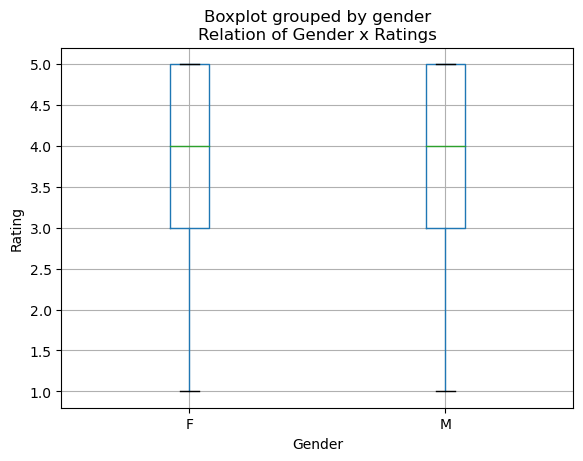

In [11]:
clean_df.boxplot('rating', by = 'gender')
plt.title('Relation of Gender x Ratings')
plt.xlabel('Gender')
plt.ylabel('Rating')

### Helpfulness x Ratings

Text(0, 0.5, 'Rating')

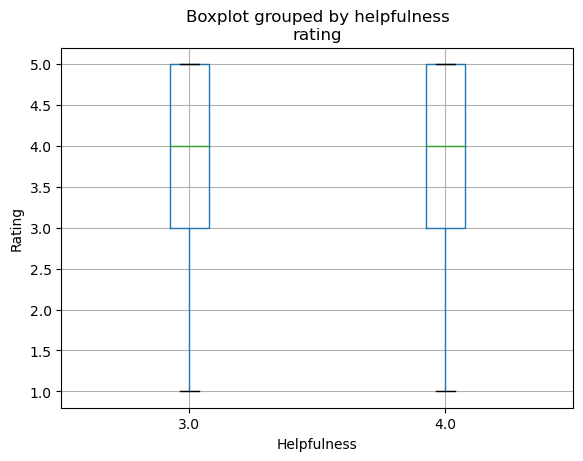

In [12]:
clean_df.boxplot('rating', by = 'helpfulness')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

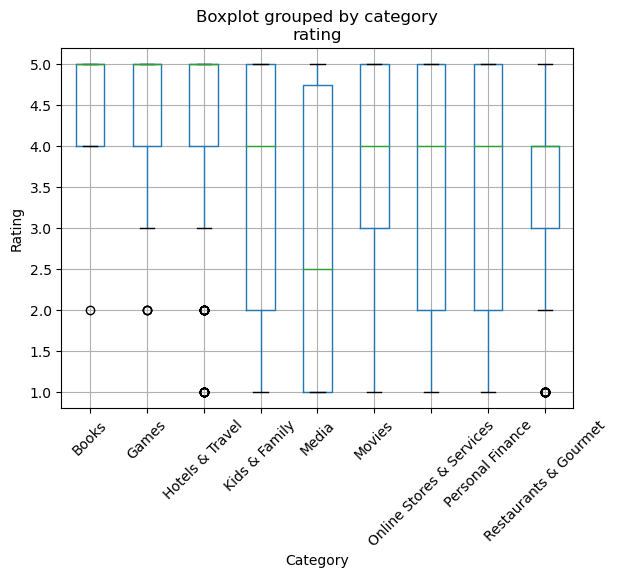

In [13]:
# category x ratings
clean_df.boxplot('rating', by = 'category')
plt.xticks(rotation = 45)
plt.xlabel('Category')
plt.ylabel('Rating')

### The Analysis Results

1) Based on the results above we found that there was no difference in ratings between genders. median rating across Genders was 4.0 with an even and similar spread.
2) Based on the results above we found that there was a slight difference in the spread of helpfulness in ratings.  However the median ratings across helpfulness was the same. 
3) Based on the results above we found that there was variation in category and ratings. Most noteably Media had a slower median (2.0) compared to other groups (~4.0). The median rating across categories was mainly 4.0. Books and games had a higher median (5.0) than other categories.

## 4. Detect and Remove Outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 

In [14]:
clean_df.shape

(2685, 12)

In [15]:
# reviews of which the helpfulness is no more than 2
remove_outlier1 = clean_df[clean_df['helpfulness'] > 2]
remove_outlier1.shape

(2685, 12)

In [16]:
# 1. find each user's rated item count
grouped_user_ratings = remove_outlier1.groupby(['userId'])['rating'].count().reset_index(name = 'count')

In [17]:
# 2. condition against users rated item count < 7
condition_less7 = grouped_user_ratings['count'] < 7

In [18]:
# 3. Get a  list of above users 
list_user_rating_less7 = grouped_user_ratings[condition_less7]['userId'].tolist()

In [19]:
# 4. Remove rows where userId exists in above list 
remove_outliers2 = remove_outlier1.drop(remove_outlier1.index[remove_outlier1['userId'].isin(list_user_rating_less7)])
remove_outliers2

,Unnamed: 0,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2680,19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [20]:
remove_outliers2.shape

(2590, 12)

In [21]:
# 1. find each items rating count
grouped_item_ratings = remove_outliers2.groupby(['item_id'])['rating'].count().reset_index(name = 'count')

In [22]:
# 2. condition against items rated count < 11
condition_less11 = grouped_item_ratings['count'] < 11

In [23]:
# 3. Get a  list of above users 
list_item_rating_less11 = grouped_item_ratings[condition_less11]['item_id'].tolist()

In [24]:
# Remove rows where item_id exists in above list 
remove_outliers3 = remove_outliers2.drop(remove_outliers2.index[remove_outliers2['item_id'].isin(list_item_rating_less11)])
remove_outliers3

,Unnamed: 0,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2680,19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [25]:
remove_outliers3.to_csv('The E-commerce Dataset.csv')
print(len(remove_outliers3))

2571
